# Collaborative Filtering

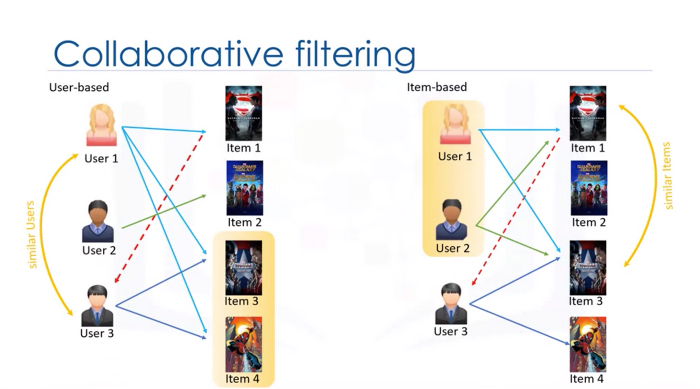

Collaborative Filtering is a recommendation technique used to create a recommendation algorithm based on the preferences of users or items (products, content, etc.). It is commonly employed in various domains such as e-commerce websites, movie and TV show platforms, music applications, and more.

The principle behind collaborative filtering is to recommend items to a user by identifying other users or items with similar preferences, based on their past choices. In other words, it tries to find users who have similar tastes and recommend items liked by those similar users.

There are two main types of collaborative filtering approaches:

- **User-Based Collaborative Filtering:** In this method, the preferences of a particular user are compared with the preferences of other users to find those with similar interests. Then, items liked by these similar users are recommended to the target user.

- **Item-Based Collaborative Filtering:** In this approach, the liking patterns of users for specific items are compared to identify similar items. Items similar to the ones the user has liked are then recommended to the target user.

# About Dataset

### Context

During the last few decades, with the rise of Youtube, Amazon, Netflix and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. As a proof of the importance of recommender systems, we can mention that, a few years ago, Netflix organised a challenges (the “Netflix prize”) where the goal was to produce a recommender system that performs better than its own algorithm with a prize of 1 million dollars to win.

By applying this simple dataset and related tasks and notebooks , we will evolutionary go through different paradigms of recommender algorithms . For each of them, we will present how they work, describe their theoretical basis and discuss their strengths and weaknesses.


### Content
The Book-Crossing dataset comprises 3 files.

*  **Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

*  **Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

*  **Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

## Libraries and Utilities

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

## Loading the dataset

In [2]:
books = pd.read_csv("kaggle/input/book-recommendation-dataset/Books.csv")
rating = pd.read_csv("kaggle/input/book-recommendation-dataset/Ratings.csv")

# Dataset Overview

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
# By using the ISBN, which is the unique code used for books, the two data sets we added before, named books and ratings, are combined.

df = rating.merge(books, how="left", on="ISBN")
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1149780 non-null  int64 
 1   ISBN                 1149780 non-null  object
 2   Book-Rating          1149780 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031135 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 96.5+ MB


In [7]:
df.shape

(1149780, 10)

In [8]:
df["Book-Title"].nunique()

241071

In [9]:
# Number of rates for each book
rating_counts = pd.DataFrame(df["Book-Title"].value_counts())
rating_counts.head(10)

,Book-Title
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,898
A Painted House,838
The Nanny Diaries: A Novel,828
Bridget Jones's Diary,815
The Secret Life of Bees,774
Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
The Red Tent (Bestselling Backlist),723
Angels &amp; Demons,670


In [10]:
# Let's remove the books with a rate less than 100 from the data set.

rare_books = rating_counts[rating_counts["Book-Title"] < 100].index
common_books = df[~df["Book-Title"].isin(rare_books)]
common_books.shape

(302443, 10)

In [11]:
common_books["Book-Title"].nunique()

914

We now have 914 books with over 100 rates.

In [12]:
user_books_df = common_books.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating")
user_books_df.shape

(38132, 914)

Rows have users, columns have books.

In [13]:
user_books_df.columns

Index(['1984', '1st to Die: A Novel', '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road', 'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash', 'A Bend in the Road', 'A Case of Need', 'A Child Called \It\": One Child's Courage to Survive"',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)', 'Women Who Run with the Wolves', 'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players', 'Wuthering Heights', 'Year of Wonders', 'You Belong To Me', 'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values', 'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=914)

# User Based Recommendation

## Selecting a Random User and Determining the Movies They Watched

In [14]:
#random_user = int(pd.Series(user_books_df.index).sample(1).values)

In [15]:
random_user = 99252  

In [16]:
random_user_df = user_books_df[user_books_df.index == random_user]

In [17]:
books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
books_read

['Anne of Green Gables (Anne of Green Gables Novels (Paperback))',
 'Message in a Bottle',
 'The Summons',
 'To Kill a Mockingbird',
 'Whispers']

We have accessed the books that the randomly selected user has read.

## Accessing the Data and IDs of Other Users Who Read the Same Books

In [18]:
# Let's create a new dataframe consisting of the books that the selected user has read.

books_read_df = user_books_df[books_read]

In [19]:
# Create a new dataframe named user_book_count that contains information about how many of the selected user's read books were read by each user.

user_book_count = books_read_df.T.notnull().sum()
user_book_count = user_book_count.reset_index()
user_book_count.columns = ["User-ID", "Book-Count"]
user_book_count

,User-ID,Book-Count
0,8,0
1,9,0
2,14,0
3,16,0
4,17,0
...,...,...
38127,278836,0
38128,278843,0
38129,278844,0
38130,278846,0


In [20]:
# Let's find users who use at least 60% of the books our users read.

perc = len(books_read) * 60 / 100
users_same_books = user_book_count[user_book_count["Book-Count"] >= perc]["User-ID"]
users_same_books

922        7346
1067       8362
1438      11676
2091      16795
2651      21014
          ...  
32541    238120
35786    260897
35971    262399
36782    268330
37547    274308
Name: User-ID, Length: 65, dtype: int64

## Determining the Users Most Similar to the User to be Recommended

In [21]:
# Let's gather the data of other users who are similar to the selected user.

final_df = pd.concat([books_read_df[books_read_df.index.isin(users_same_books)], random_user_df[books_read]])

In [22]:
# Create a new dataframe named corr_df which will contain the correlations between users.

corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ["user_id_1", "user_id_2"]
corr_df = corr_df.reset_index()
corr_df

,user_id_1,user_id_2,corr
0,102647,7346,-1.000000
1,99252,43842,-0.997509
2,16795,112001,-0.997406
3,201017,99252,-0.994135
4,11676,112001,-0.989743
...,...,...,...
113,11676,59172,0.985136
114,55548,187145,1.000000
115,236283,30972,1.000000
116,260897,231210,1.000000


In [23]:
# Filter users with high correlation (above 0.50) with the selected user and create a new dataframe named top_users.

top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] > 0.50)][["user_id_2", "corr"]].reset_index(drop=True)
top_users

,user_id_2,corr
0,11676,0.534861
1,231210,0.755929
2,159033,0.755929
3,187145,0.755929
4,105979,0.967868


In [24]:
top_users = top_users.sort_values(by="corr", ascending=False)
top_users.rename(columns={"user_id_2": "User-ID"}, inplace=True)
top_users

,User-ID,corr
4,105979,0.967868
3,187145,0.755929
2,159033,0.755929
1,231210,0.755929
0,11676,0.534861


In [25]:
# Let's combine the rates given by these similar users with rating.csv and observe.

rating = pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")
final = top_users.merge(rating[["User-ID", "ISBN", "Book-Rating"]], how="inner")
top_users_ratings = final[final["User-ID"] != random_user]

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/book-recommendation-dataset/Ratings.csv'

## Calculating the Weighted Average Recommendation Score and Recommending a Book

In [ ]:
top_users_ratings["weighted_rating"] = top_users_ratings["corr"] * top_users_ratings["Book-Rating"]

# In this way, we have corrected the rating values according to the correlation.

In [ ]:
recommendation_df = top_users_ratings.groupby("ISBN").agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df.head()

In [ ]:
books_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3.7].sort_values("weighted_rating", ascending=False)

In [ ]:
book = pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv")
recommend = books_to_be_recommend.merge(book[["ISBN", "Book-Title"]])
recommend = list(recommend["Book-Title"].loc[0:5])

In [ ]:
recommend

We recommended 6 movies to our randomly selected user using the user-based recommendation system.

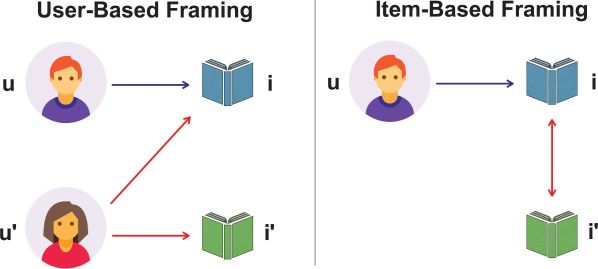

# Item Based Recommendation

### Loading the Dataset

In [ ]:
books = pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv")
rating = pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")

### Get the ISBN of the book with the most recent rating from the user's book that received a rating of 9.

In [ ]:
random_user = 99252

In [ ]:
book_id = rating[(rating["User-ID"] == random_user) & (rating["Book-Rating"] == 9)].iloc[0][1]
book_id

In [ ]:
book[book["ISBN"] == book_id]

In [ ]:
book_name = "Whispers"
book_name = user_books_df[book_name]

In [ ]:
recommend_book = user_books_df.corrwith(book_name).sort_values(ascending=False)

In [ ]:
recommend = recommend_book.reset_index()
recommend.columns = ["book_name", "corr"]
recommend = list(recommend.loc[1:3, "book_name"])
recommend

# Summary

In this notebook study, we made book recommendations for our randomly selected user in a large book dataset through item and user based recommendation systems. On a per-user basis, we found users who were behaviorally similar to our users and recommended their favorite books to our users. On the basis of items, we suggested the three books most similar to the rating structure of the book our user read.

### **Thank you for your time. Please UPVOTE if it was helpful to you.**